chapter03 회귀 알고리즘과 모델 규제  
03-1 k-최근점 이웃 회귀

In [ ]:
import numpy as np  # numpy import

# 농어 데이터(길이, 무게) 56개
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


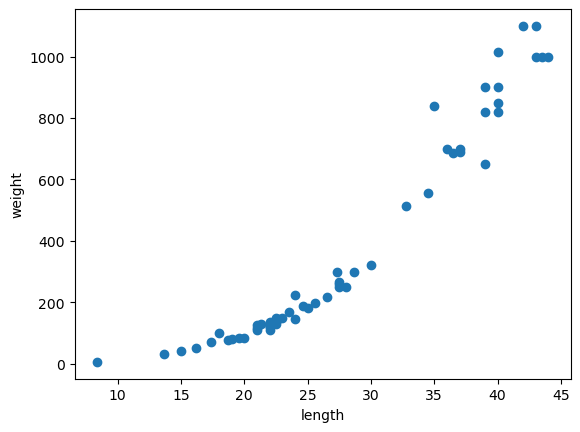

In [ ]:
# 산점도 그래프
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 사이킷런의 train_test_split() 함수를 사용해 훈련 세트와 테스트 세트로 나눔
# 실습용으로 동일한 데이터 얻기 위해 random_state = 42로 지정
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state =42)

사이킷런에 사용할 훈련 세트는 2차원 배열이어야 함  
perch_lentgh가 1차원 배열이기 때문에 이를 나누는 train_inut, test_input도 1차원 배열  
> 2차원 배열로 바꿔줘야 함

[방법]  
reshape() :바꾸려는 배열의 크기 지정 가능  
reshape(-1,x) :배열의 크기 자동 지정  

In [10]:
train_input = train_input.reshape(-1,1) #첫 번째 크기 자동, 두번째 크기 1로 설정
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)


(42, 1) (14, 1)


KNeighborsRegressor  
사이킷런의 k-최근접 이웃 회귀 알고리즘 구현 클래스

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# 모델훈련
knr.fit(train_input, train_target)

# 테스트 세트 점수확인
print(knr.score(test_input, test_target))

0.992809406101064


분류의 경우 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율인 '정확도'로 계산  
회귀는 예측하는 값이나 타깃 모두 임의의 수치이므로 '결정계수(R^2)'로 평가

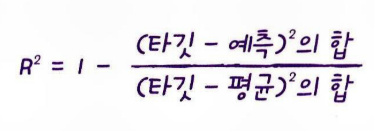

사이킷런의 score() 메서드 출력값은 높을수록 좋음

In [ ]:
# 타깃과 예측값 사이의 차이 구해보기
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [ ]:
# 테스트 세트 아닌 훈련 세트로 모델 평가
print(knr.score(train_input, train_target))

0.9698823289099254


test set score = 0.9928  
train set score = 0.9699  

train set으로 모델을 훈련하므로 보통 train set의 점수가 조금 더 높게 나옴  

훈련 세트 score > 테스트 세트 score : 과대적합(훈련 세트에만 잘 맞는 모델)  
훈련 세트 score < 테스트 세트 score or 두 점수 모두 낮은 경우 : 과소적합(모델이 너무 단순해 훈련 세트에 적절히 훈련되지 않은 경우)  

우리 모델은 훈련 세트보다 테스트 세트의 점수가 높으므로 '과소적합'

[과소적합 해결방법]  
모델을 더 복잡하게 만들기  
k-최근접 이웃 알고리즘으로 모델을 더 복잡하게 만드는 방법 = 이웃의 개수 k를 줄이는 것

In [ ]:
# 이웃의 개수를 기본값 5에서 3으로 바꿈
knr.n_neighbors =3

# 모델 훈련
knr.fit(train_input, train_target)
# 훈련 세트 점수
print(knr.score(train_input, train_target))

0.9804899950518966


In [ ]:
# 테스트 세트 점수
print(knr.score(test_input, test_target))

0.9746459963987609


훈련 세트의 점수와 테스트 세트의 점수 차이가 크면 좋지 않음  
일반적으로 훈련 세트의 점수가 테스트 세트보다 조금 더 높음  
[과대적합]  
테스트 세트의 점수가 너무 낮은 경우  
모델을 덜 복잡하게 만들어야 함  
k-최근접 이웃의 경우 k 값을 늘림  
[과소적합]  
테스트 세트 점수가 너무 높거나 두 점수가 모두 낮은 경우  
모델을 더 복잡하게 만들어야 함  
k-최근접 이웃의 경우 k 값을 줄임  